In [60]:
import skfuzzy as fuzzy
import pandas as pd

df = pd.read_csv('../Data/fluML.csv')
working_frame = df.iloc[:,1:8].copy(deep=True)
working_frame['Sick'] = df.iloc[:,15].copy(deep=True)
print working_frame.head()
print min(working_frame.SocialDist)
print max(working_frame.SocialDist)
print min(working_frame.HndWshQual)
print max(working_frame.HndWshQual)
print len(working_frame[working_frame['Vaccin'] == 9.0].values)

   Vaccin  HndWshQual  HndWshFreq  SocialDist  NotTchFace  RespEtiq  \
0     3.0         4.0         4.0         2.0         1.0       5.0   
1     2.0         4.0         4.0         5.0         2.0       5.0   
2     3.0         2.0         2.0         2.0         3.0       2.0   
3     3.0         3.0         2.0         2.0         2.0       5.0   
4     2.0         5.0         3.0         3.0         2.0       5.0   

   PrsnlDist  Sick  
0        1.0   0.0  
1        4.0   1.0  
2        2.0   0.0  
3        3.0   2.0  
4        5.0   1.0  
1.0
5.0
1.0
5.0
2


In [2]:
print working_frame.shape

(417, 8)


In [48]:

x_vacc = working_frame.Vaccin
x_hwq = working_frame.HndWshQual
#x_hwf = working_frame.HndWshFreq
#x_sd = working_frame.SocialDist
#x_ntf = working_frame.NotTchFace
#x_re = working_frame.RespEtiq
#x_pd = working_frame.PrsnlDist
x_sick = working_frame.Sick


In [49]:
# Feature: Vaccine
x_vacc_lo = fuzzy.trimf(x_vacc, [1,3,5])
x_vacc_md = fuzzy.trimf(x_vacc, [3,5,7])
x_vacc_hi = fuzzy.trimf(x_vacc, [5,7,9])
#print "lo", ":", x_vacc_lo
#print "md", ":", x_vacc_md
#print "hi", ":", x_vacc_hi

# Feature: Hand Wash Quality 
x_hwq_lo = fuzzy.trimf(x_hwq, [1,2,3])
x_hwq_md = fuzzy.trimf(x_hwq, [2,3,4])
x_hwq_hi = fuzzy.trimf(x_hwq, [3,4,5])

# Feature: Sick (target variable)
x_sick_lo = fuzzy.trimf(x_sick, [0,0,1])
x_sick_md = fuzzy.trimf(x_sick, [0,1,2])
x_sick_hi = fuzzy.trimf(x_sick, [1,2,2])


## Trapezoidal input feature, Triangular output feature

In [61]:
# Feature: Vaccine
x_vacc_lo = fuzzy.trapmf(x_vacc, [1,2,3,4])
x_vacc_md = fuzzy.trapmf(x_vacc, [4,4,5,6])
x_vacc_hi = fuzzy.trapmf(x_vacc, [6,7,8,9])
#print "lo", ":", x_vacc_lo
#print "md", ":", x_vacc_md
#print "hi", ":", x_vacc_hi

# Feature: Hand Wash Quality 
x_hwq_lo = fuzzy.trapmf(x_hwq, [1,1,2,3])
x_hwq_md = fuzzy.trapmf(x_hwq, [2,3,4,5])
x_hwq_hi = fuzzy.trapmf(x_hwq, [3,4,5,5])

# Feature: Sick (target variable)
x_sick_lo = fuzzy.trimf(x_sick, [0,0,1])
x_sick_md = fuzzy.trimf(x_sick, [0,1,2])
x_sick_hi = fuzzy.trimf(x_sick, [1,2,2])

## Gaussian Input features, Triangular Output feature

In [77]:
import numpy as np
# Feature: Vaccine
xvlo = [1,2,3,4,5]
xvmd = [3,4,5,6,7]
xvhi = [5,6,7,8,9]
x_vacc_lo = fuzzy.gaussmf(xvlo,np.mean(xvlo), np.std(xvlo))
x_vacc_md = fuzzy.gaussmf(xvmd,np.mean(xvmd), np.std(xvmd))
x_vacc_hi = fuzzy.gaussmf(xvhi,np.mean(xvhi), np.std(xvhi))
#print "lo", ":", x_vacc_lo
#print "md", ":", x_vacc_md
#print "hi", ":", x_vacc_hi

# Feature: Hand Wash Quality 
xhwqlo = [1,2,3]
xhwqmd = [2,3,4]
xhwqhi = [3,4,5]
x_hwq_lo = fuzzy.gaussmf(xhwqlo, np.mean(xhwqlo), np.std(xhwqlo))
x_hwq_md = fuzzy.gaussmf(xhwqmd, np.mean(xhwqmd), np.std(xhwqmd))
x_hwq_hi = fuzzy.gaussmf(xhwqhi, np.mean(xhwqhi), np.std(xhwqhi))

# Feature: Sick (target variable)
x_sick_lo = fuzzy.trimf(x_sick, [0,0,1])
x_sick_md = fuzzy.trimf(x_sick, [0,1,2])
x_sick_hi = fuzzy.trimf(x_sick, [1,2,2])

In [78]:
# visualizing the membership functions
from matplotlib import pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))
ax0.plot(xvlo, x_vacc_lo, 'b', linewidth=1.5, label='low vaccine')
ax0.plot(xvmd, x_vacc_md, 'g', linewidth=1.5, label='mid vaccine')
ax0.plot(xvhi, x_vacc_hi, 'r', linewidth=1.5, label='high vaccine')
ax0.set_title('Vaccine')
ax0.legend()

ax1.plot(xhwqlo, x_hwq_lo, 'b', linewidth=1.5, label='low HWQ')
ax1.plot(xhwqmd, x_hwq_md, 'g', linewidth=1.5, label='mid HWQ')
ax1.plot(xhwqhi, x_hwq_hi, 'r', linewidth=1.5, label='high HWQ')
ax1.set_title('Hand Wash Quality')
ax1.legend()

ax2.plot(x_sick, x_sick_lo, 'b', linewidth=1.5, label='low sickness')
ax2.plot(x_sick, x_sick_md, 'g', linewidth=1.5, label='mid sickness')
ax2.plot(x_sick, x_sick_hi, 'r', linewidth=1.5, label='high sickness')
ax2.set_title('Sick')
ax2.legend()

In [71]:
# visualizing the membership functions
from matplotlib import pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))
ax0.plot(x_vacc, x_vacc_lo, 'b', linewidth=1.5, label='low vaccine')
ax0.plot(x_vacc, x_vacc_md, 'g', linewidth=1.5, label='mid vaccine')
ax0.plot(x_vacc, x_vacc_hi, 'r', linewidth=1.5, label='high vaccine')
ax0.set_title('Vaccine')
ax0.legend()

ax1.plot(x_hwq, x_hwq_lo, 'b', linewidth=1.5, label='low HWQ')
ax1.plot(x_hwq, x_hwq_md, 'g', linewidth=1.5, label='mid HWQ')
ax1.plot(x_hwq, x_hwq_hi, 'r', linewidth=1.5, label='high HWQ')
ax1.set_title('Hand Wash Quality')
ax1.legend()

ax2.plot(x_sick, x_sick_lo, 'b', linewidth=1.5, label='low sickness')
ax2.plot(x_sick, x_sick_md, 'g', linewidth=1.5, label='mid sickness')
ax2.plot(x_sick, x_sick_hi, 'r', linewidth=1.5, label='high sickness')
ax2.set_title('Sick')
ax2.legend()

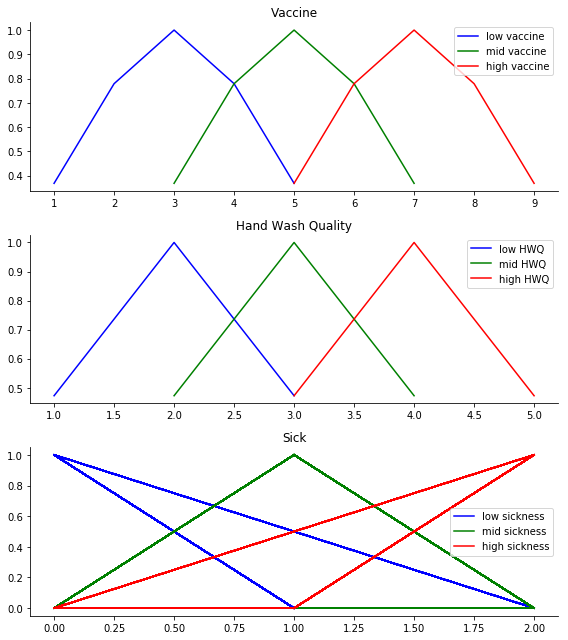

In [79]:
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [80]:
# from here, user input begins
import numpy as np

vacc_lo = fuzzy.interp_membership(x_vacc, x_vacc_lo, 3)
vacc_md = fuzzy.interp_membership(x_vacc, x_vacc_md, 3)
vacc_hi = fuzzy.interp_membership(x_vacc, x_vacc_hi, 3)

hwq_lo = fuzzy.interp_membership(x_hwq, x_hwq_lo, 4)
hwq_md = fuzzy.interp_membership(x_hwq, x_hwq_md, 4)
hwq_hi = fuzzy.interp_membership(x_hwq, x_hwq_hi, 4)

rule_lo = np.fmax(vacc_lo, hwq_lo)
sick_activn_lo = np.fmin(rule_lo, x_sick_lo)
rule_md = np.fmax(vacc_md, hwq_md)
sick_activn_md = np.fmin(rule_md, x_sick_md)
rule_hi = np.fmax(vacc_hi, hwq_hi)
sick_activn_hi = np.fmin(rule_hi, x_sick_hi)

sick0 = np.zeros_like(x_sick)




ValueError: fp and xp are not of the same length.

In [81]:
import numpy as np

vacc_lo = fuzzy.interp_membership(xvlo, x_vacc_lo, 3)
vacc_md = fuzzy.interp_membership(xvmd, x_vacc_md, 3)
vacc_hi = fuzzy.interp_membership(xvhi, x_vacc_hi, 3)

hwq_lo = fuzzy.interp_membership(xhwqlo, x_hwq_lo, 4)
hwq_md = fuzzy.interp_membership(xhwqmd, x_hwq_md, 4)
hwq_hi = fuzzy.interp_membership(xhwqhi, x_hwq_hi, 4)

rule_lo = np.fmax(vacc_lo, hwq_lo)
sick_activn_lo = np.fmin(rule_lo, x_sick_lo)
rule_md = np.fmax(vacc_md, hwq_md)
sick_activn_md = np.fmin(rule_md, x_sick_md)
rule_hi = np.fmax(vacc_hi, hwq_hi)
sick_activn_hi = np.fmin(rule_hi, x_sick_hi)

sick0 = np.zeros_like(x_sick)


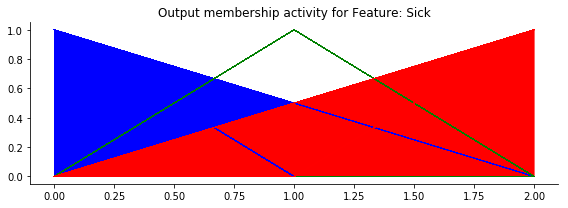

In [82]:
#visualization
fig, ax0 = plt.subplots(figsize=(8,3))
ax0.fill_between(x_sick, sick0, sick_activn_lo, facecolor='b', alpha=0.7)
ax0.plot(x_sick,x_sick_lo, 'b', linewidth=0.5, linestyle='--')

ax0.fill_between(x_sick, sick0, sick_activn_md, facecolor='g', alpha=0.7)
ax0.plot(x_sick,x_sick_md, 'g', linewidth=0.5, linestyle='--')

ax0.fill_between(x_sick, sick0, sick_activn_hi, facecolor='r', alpha=0.7)
ax0.plot(x_sick,x_sick_hi, 'r', linewidth=0.5, linestyle='--')

ax0.set_title('Output membership activity for Feature: Sick')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [83]:
import math
def defuzz(x, mfx):
    sum_moment_area = 0; sum_area=0
    if len(x) == 1:
        return x[0]*mfx[0] / np.fmax(mfx[0], np.finfo(float).eps).astype(float)
    
    # else return the sum of moment*area/sum of area
    for i in range(1, len(x)):
        x1 = x[i - 1]
        #print x1
        x2 = x[i]
        #print x2
        y1 = mfx[i - 1]
        #print y1
        y2 = mfx[i]
        #print y2
        
        # if y1 == y2 == 0.0 or x1==x2: --> rectangle of zero height or width
        if not(y1 == y2 == 0.0 or x1 == x2):
            if y1 == y2:  # rectangle
                moment = 0.5 * (x1 + x2)
                area = (x2 - x1) * y1
            elif y1 == 0.0 and y2 != 0.0:  # triangle, height y2
                moment = 2.0 / 3.0 * (x2-x1) + x1
                area = 0.5 * (x2 - x1) * y2
            elif y2 == 0.0 and y1 != 0.0:  # triangle, height y1
                moment = 1.0 / 3.0 * (x2 - x1) + x1
                area = 0.5 * (x2 - x1) * y1
            else:
                moment = (2.0 / 3.0 * (x2-x1) * (y2 + 0.5*y1)) / (y1+y2) + x1
                area = 0.5 * (x2 - x1) * (y1 + y2)
            if math.isnan(area) or math.isnan(moment):
                continue
            sum_moment_area += moment * area
            sum_area += area
    print "SMA", abs(sum_moment_area)
    print "SA", abs(sum_area)
    return sum_moment_area / np.fmax(sum_area, np.finfo(float).eps).astype(float)

SMA 0.379389078765
SA 3.26381672363
0.116240926158
0.938667399419


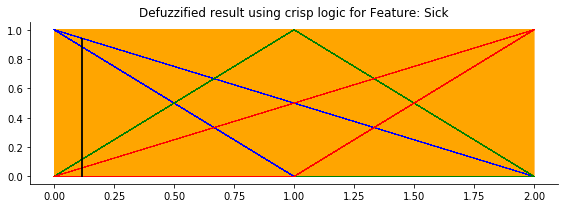

In [84]:
# Defuzzification using the centroid method
#visualization

aggregation_of_3_membership = np.fmax(sick_activn_lo, np.fmax(sick_activn_md, sick_activn_hi))
#print aggregation_of_3_membership
sickness_score = defuzz(x_sick, aggregation_of_3_membership) # it is made for only centroid
sickness_score = abs(sickness_score)
print sickness_score
sickness_membership_score = fuzzy.interp_membership(x_sick, aggregation_of_3_membership, sickness_score)
sickness_membership_score  = abs(sickness_membership_score)
print sickness_membership_score
fig, ax0 = plt.subplots(figsize=(8,3))

ax0.plot(x_sick,x_sick_lo, 'b', linewidth=0.5, linestyle='--')

ax0.plot(x_sick,x_sick_md, 'g', linewidth=0.5, linestyle='--')

ax0.plot(x_sick,x_sick_hi, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(x_sick, sick0, aggregation_of_3_membership, facecolor='Orange', alpha=0.7)
ax0.plot([sickness_score, sickness_score],[0,sickness_membership_score],'k', linewidth=2.0, alpha=0.9)
ax0.set_title('Defuzzified result using crisp logic for Feature: Sick')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

In [12]:
import math
def test(x, mfx):
    sum_moment_area = 0; sum_area=0
    if len(x) == 1:
        return x[0]*mfx[0] / np.fmax(mfx[0], np.finfo(float).eps).astype(float)
    
    # else return the sum of moment*area/sum of area
    for i in range(1, len(x)):
        x1 = x[i - 1]
        #print x1
        x2 = x[i]
        #print x2
        y1 = mfx[i - 1]
        #print y1
        y2 = mfx[i]
        #print y2
        
        # if y1 == y2 == 0.0 or x1==x2: --> rectangle of zero height or width
        if not(y1 == y2 == 0.0 or x1 == x2):
            if y1 == y2:  # rectangle
                moment = 0.5 * (x1 + x2)
                area = (x2 - x1) * y1
            elif y1 == 0.0 and y2 != 0.0:  # triangle, height y2
                moment = 2.0 / 3.0 * (x2-x1) + x1
                area = 0.5 * (x2 - x1) * y2
            elif y2 == 0.0 and y1 != 0.0:  # triangle, height y1
                moment = 1.0 / 3.0 * (x2 - x1) + x1
                area = 0.5 * (x2 - x1) * y1
            else:
                moment = (2.0 / 3.0 * (x2-x1) * (y2 + 0.5*y1)) / (y1+y2) + x1
                area = 0.5 * (x2 - x1) * (y1 + y2)
            if math.isnan(area) or math.isnan(moment):
                continue
            sum_moment_area += moment * area
            sum_area += area
    print "SMA", sum_moment_area
    print "SA", sum_area
    return sum_moment_area / np.fmax(sum_area, np.finfo(float).eps).astype(float)

print test(x_sick, aggregation_of_3_membership)

SMA -0.194444444444
SA 1.41666666667
-0.137254901961


In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
#qual_md = fuzz.trapmf(x_qual, [0, 2, 8, 10])
qual_md = fuzz.gaussmf(x_qual, np.mean(x_qual), np.std(x_qual))
'''
qual_hi = fuzz.trimf(x_qual, [5, 5, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])
'''
# Visualize these universes and membership functions
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 9))

#ax0.plot(x_qual, qual_lo, 'm', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'k', linewidth=1.5, label='Decent')
#ax0.plot(x_qual, qual_hi, 'b', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()
'''
ax1.plot(x_serv, serv_lo, 'm', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'k', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'b', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'm', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'k', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'b', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()
'''
# Turn off top/right axes
#for ax in (ax0):
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()

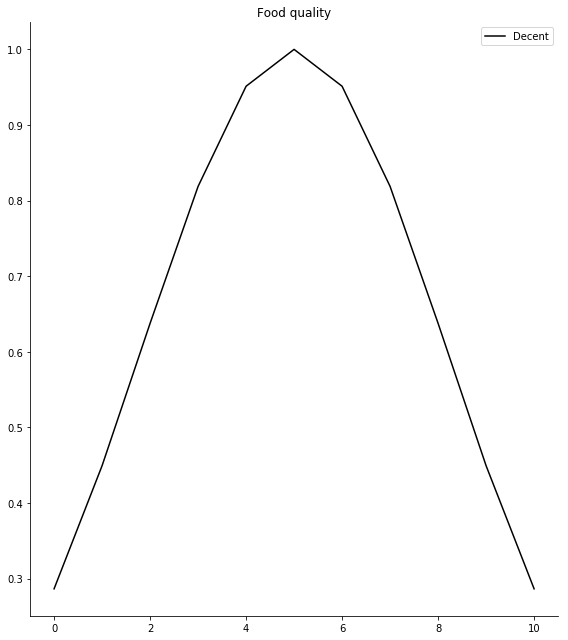

In [19]:
plt.show()

In [20]:
qual_md

array([ 0.2865048 ,  0.44932896,  0.63762815,  0.81873075,  0.95122942,
        1.        ,  0.95122942,  0.81873075,  0.63762815,  0.44932896,
        0.2865048 ])